In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
np.set_printoptions(formatter={'int': "\t{:d}".format,'float': "\t{:0.2f}".format})

<style>
body {
    font-size: 20px; /* Adjust this value as needed */
}
</style>

# Least Squares (setup)

We suppose that we are given observation data with two quantities $(x,y)$:

| $x$ | 0 | 1 | 2 | 3 | 4 |
|:-----|---|---|---|---|---|
| $y$ |0.78|2.84|3.58|6.31|6.18|

And we plot it now.

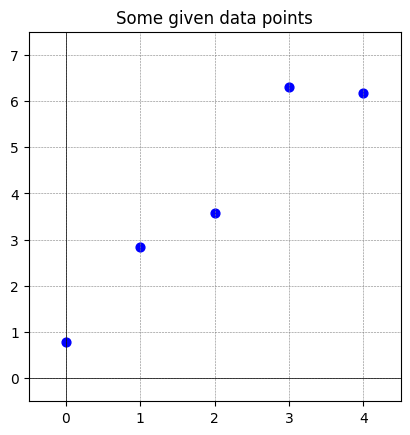

In [2]:
# X and Y data
X = np.arange(5);
Y1 = np.array([0.78,2.84,3.58,6.31,6.18])

fig, ax = plt.subplots(1,1,figsize = plt.figaspect(1)) # This way is more compatible with multiple figures.

# Doing the plots
ax.scatter(X,Y1,s=40,color='blue')

# Draw axis lines and grid
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='grey',linestyle='--',linewidth=0.4)

# Set plot window
dx = 0.5; # buffer(s) for window
ax.set_xbound(0-dx,4+dx)
ax.set_ybound(0-dx,7+dx)

ax.set_title('Some given data points')
plt.show()

We "hypothesize" that the $y$-values 'depend' on $x$ in roughly a linear fashion. That is, we think that $y$ is a *dependent variable* approximately following a pattern of $y \approx ax+b$. In an ideal scenario, this approximate "$\approx$" would be replaced with a true equality "$=$". In a table fashion, we'd like that

$$
    \begin{align}
    xa+1b &= y \\
    \hline
    0a+1b &= 0.78 \\
    1a+1b &= 2.84 \\
    2a+1b &= 3.84 \\
    3a+1b &= 6.31 \\
    4a+1b &= 6.18,
    \end{align}
\qquad\text{which we can write as}\qquad 
    a \begin{bmatrix} 
        0 \\ 1 \\ 2 \\ 3 \\ 4
    \end{bmatrix}
    + b \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
    = \begin{bmatrix} 0.78 \\ 2.78 \\ 3.84 \\ 6.31 \\ 6.18 \end{bmatrix}
$$
$$
    \text{or} \qquad
    \begin{bmatrix} 
        0 & 1 \\
        1 & 1 \\
        2 & 1 \\
        3 & 1 \\
        4 & 1 
    \end{bmatrix}
    \begin{bmatrix} a \\ b \end{bmatrix} 
    = \begin{bmatrix} 0.78 \\ 2.78 \\ 3.84 \\ 6.31 \\ 6.18 \end{bmatrix}, \qquad\text{or}\qquad
    \mathbf{A}\mathbf{x} = \mathbf{y}, \quad\text{with}\quad
    \mathbf{x} = \begin{bmatrix} a \\ b \end{bmatrix}.
$$

Thus, the vector $\mathbf{x}$ represents the "parameters" of our linear model $ax+b$.

Unfortunately it is unlikely that an *exact* solution $\mathbf{x}$ will exist, because there are way more equations than variables (but this is expected since we often have tons of data). So then... how can we get $\mathbf{A}\mathbf{x}$ as close as possible to $\mathbf{y}$? That is, how can we minimize $\|\mathbf{A}\mathbf{x}-\mathbf{y}\|$, which is equivalent to minimizing $\|\mathbf{A}\mathbf{x}-\mathbf{y}\|^{2}$ ? (Note, because the (length-of-vector)${}^{2}$ is the sum-of-(components${}^{2}$), this is why it is "*least squares*")

It is not intuitive that the following works (at least, without a little bit of matrix theory), but the desired minimizer $\mathbf{x}$ is
$$ \mathbf{x} = \big(\mathbf{A}^{\mathrm{T}}\mathbf{A}\big)^{-1}\mathbf{A}^{\mathrm{T}}\mathbf{y}, $$
where $\mathbf{A}^{\mathrm{T}}$ is the "transpose" of $\mathbf{A}$.

In [3]:
X = np.arange(5)
A = np.transpose(np.array([
    [x for x in X],
    [1 for x in X]
]))

# Computing x according to the above formula, and then rounding
leastSqVec = np.linalg.inv(A.T @ A) @ A.T @ Y1

# Extracting the parameters
a, b = np.round(leastSqVec, decimals=2)

# Printing
print('\nThe approximate parameters are a={a} and b={b},\nso the \'best fit\' model is y = ({a})x + {b}\n'.format(**{'a':a,'b':b}))


The approximate parameters are a=1.43 and b=1.08,
so the 'best fit' model is y = (1.43)x + 1.08



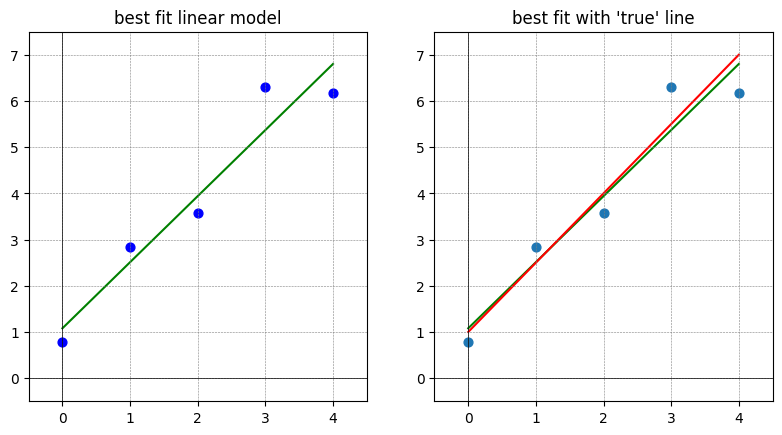

In [4]:
# Now checking how our model looks with the data
fig, (ax1,ax2) = plt.subplots(1,2,figsize = plt.figaspect(0.5)) 

X = np.arange(5);

# ===== Subplot 1 =====
# Making the plots
ax1.plot(X, a*X+b, color='green', zorder=0) # The computed model
ax1.scatter(X, Y1, s=40, color='blue') # The data

# Draw axis lines and grid
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.grid(color='grey',linestyle='--',linewidth=0.4)

# Set plot window
dx = 0.5; # buffer(s) for window
ax1.set_xbound(0-dx,4+dx)
ax1.set_ybound(0-dx,7+dx)

ax1.set_title("best fit linear model")

# ===== Subplot 2 =====
# Making the plots
ax2.plot(X, a*X+b, color='green', zorder=0) # Computed model
ax2.plot(X, (1.5)*X+(1.0), color='red', zorder=0) # The 'true' model
ax2.scatter(X, Y1, s=40) # The data

# Draw axis lines and grid
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(color='grey',linestyle='--',linewidth=0.4)

# Set plot window
dx = 0.5; # buffer(s) for window
ax2.set_xbound(0-dx,4+dx)
ax2.set_ybound(0-dx,7+dx)

ax2.set_title("best fit with \'true\' line")

plt.show()

Side-by-side we plot the least-squares best fit model (green line), and a plot with the 'true' model (red line) that I originally used to generate the data (before adding random noise). In total,
    $$
    \begin{aligned}
    \text{Computed model:}\quad y &= (1.43)x + 1.08, \\
    \text{`True' model:}\quad y &= (1.50)x + 1.00,
    \end{aligned}
    $$
which isn't terrible---the noise I added was significant, and there so few sample points.

## How I originally generated the data

In [10]:
X = np.arange(5)
Y0 = (1.5)*X + 1 # The 'true' model

noise1 = np.array([-0.22,0.34,-0.42,0.81,-0.82])
# Though I set this manually to give the same results each time the notebook is run, the way you can generate random noise is 
#     noise = [random.random() for _ in range(len(X))].
# In fact, I scaled the noise a bit:
#     noise = [ 2*(random.random()-0.5) for _ in range(len(X)) ]

Y1 = Y0 + noise1

---
# **Trying more complicated data**

Now we suppose that we are given a new set of data points $(x,y)$ with the following form:

| $x$  | 0  | 1  | 2  | 3  | 4  | 5   |  6  |  7  |  8  |  9  |
|:-----|----|----|----|----|----|-----|-----|-----|-----|-----|
| $y$  |1.66|1.58|2.11|4.40|3.86|10.60|15.85|20.66|26.59|32.38|


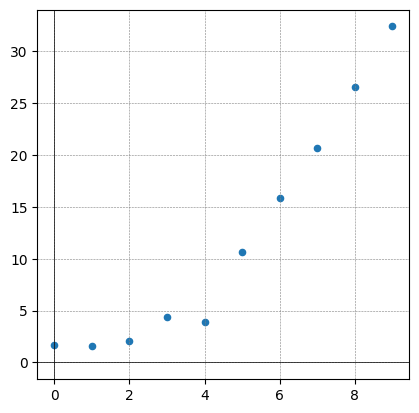

In [5]:
X = np.arange(10)
Y2 = np.array([1.66,1.58,2.11,4.40,3.86,10.60,15.85,20.66,26.59,32.38])

fig, ax = plt.subplots(1,1,figsize = plt.figaspect(1))
ax.scatter(X,Y2,s=20)

# Draw axis lines and grid
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='grey',linestyle='--',linewidth=0.4)

plt.show()

If we again try a linear model $y = ax+b$, we would set up the equalities
$$
    \begin{align}
        ax+1b &= y \\
    \hline
        0a+1b &= 1.66 \\
        1a+1b &= 1.58 \\
        2a+1b &= 2.11 \\
        3a+1b &= 4.40 \\
        4a+1b &= 3.86 \\
        5a+1b &= 10.60 \\
        6a+1b &= 15.85 \\
        7a+1b &= 20.66 \\
        8a+1b &= 26.59 \\
        9a+1b &= 32.38,
    \end{align} 
\qquad\text{which leads to}\qquad
    \begin{bmatrix} 
        0 & 1 \\
        1 & 1 \\
        2 & 1 \\
        3 & 1 \\
        4 & 1 \\
        5 & 1 \\
        6 & 1 \\
        7 & 1 \\
        8 & 1 \\
        9 & 1 
    \end{bmatrix}
    \begin{bmatrix} a \\ b \end{bmatrix} =
    \begin{bmatrix} 
        1.66 \\
        1.58 \\
        2.11 \\
        4.40 \\
        3.86 \\
        10.60 \\
        15.85 \\
        20.66 \\
        26.59 \\
        32.38
    \end{bmatrix}, 
    \qquad\text{which we again write as $\mathbf{A}\mathbf{x}=\mathbf{y}$.}
$$

Again the "optimal" $\mathbf{x}$ describing our parameters is
    $$
        \mathbf{x} = \big(\mathbf{A}^{\mathrm{T}}\mathbf{A}\big)^{-1}\mathbf{A}^{\mathrm{T}}\mathbf{y}.
    $$

In [6]:
A = np.transpose(np.array([
    [x for x in X],
    [1 for x in X]
])) # transpose is more efficient that entering the rows manually

# Computing x according to the above formula
leastSqVec = np.linalg.inv(A.T @ A) @ A.T @ Y2

# Extracting the (rounded) parameters
a, b = np.round(leastSqVec, decimals=2)

# Printing
print('The approximate parameters are a={a} and b={b},\n so the \'best fit\' model is y = ({a})x + {b}'.format(**{'a':a,'b':b}))

The approximate parameters are a=3.55 and b=-4.0,
 so the 'best fit' model is y = (3.55)x + -4.0


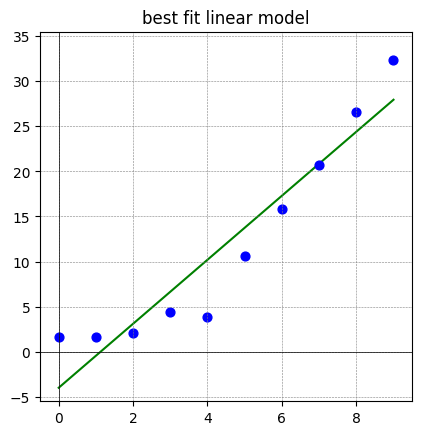

In [7]:
# Now checking how our model looks with the data
fig, ax = plt.subplots(1,1,figsize = plt.figaspect(1)) # This way is more compatible with multiple figures.

X = np.arange(10)

# ===== Subplot 1 =====
# Making the plots
ax.plot(X, a*X+b, color='green', zorder=0) # Fit model
ax.scatter(X, Y2, s=40, color='blue') # Data

# Draw axis lines and grid
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='grey',linestyle='--',linewidth=0.4)

# Set plot window
dx = 0.5; # buffer(s) for window
ax.set_xbound(0-dx,9+dx)
ax.set_ybound(-5-dx,35+dx)

ax.set_title("best fit linear model")

plt.show()

## Trying a different model

The above doesn't look like a great fit. What if we thought a parabolic (quadratic) model was more appropriate? Still using the same data

| $x$  | 0  | 1  | 2  | 3  | 4  | 5   |  6  |  7  |  8  |  9  |
|:-----|----|----|----|----|----|-----|-----|-----|-----|-----|
| $y$  |1.66|1.58|2.11|4.40|3.86|10.60|15.85|20.66|26.59|32.38|

we now suppose that $y = ax^{2}+bx+c$, where $a$, $b$, and $c$ are unknown parameters. We would then have the table of equalities
$$
    \begin{align}
        ax^{2}+bx+c &= y \\
        \hline
        0a+0b+1c &= 1.66 \\
        1a+1b+1c &= 1.58 \\
        4a+2b+1c &= 2.11 \\
        9a+3b+1c &= 4.40 \\
        16a+4b+1c &= 3.86 \\
        25a+5b+1c &= 10.60 \\
        36a+6b+1c &= 15.85 \\
        49a+7b+1c &= 20.66 \\
        64a+8b+1c &= 26.59 \\
        81a+9b+1c &= 32.38,
    \end{align} 
    \qquad\text{which leads to}\qquad
    \begin{bmatrix} 
        0 & 0 & 1 \\ 
        1 & 1 & 1 \\
        4 & 2 & 1 \\
        9 & 3 & 1 \\
        16 & 4 & 1 \\
        25 & 5 & 1 \\
        36 & 6 & 1 \\
        49 & 7 & 1 \\
        64 & 8 & 1 \\ 
        81 & 9 & 1 
    \end{bmatrix} 
    \begin{bmatrix} a \\ b \\ c \end{bmatrix} = 
    \begin{bmatrix} 1.66 \\ 1.58 \\ 2.11 \\ 4.40 \\ 3.86 \\ 10.60 \\ 15.85 \\ 20.66 \\ 26.59 \\ 32.38 \end{bmatrix}
$$
Though our matrix $\mathbf{A}$ is now has $3$ columns, we still use the formula 
    $$
        \mathbf{x} = \big(\mathbf{A}^{\mathrm{T}}\mathbf{A}\big)^{-1}\mathbf{A}^{\mathrm{T}}\mathbf{y}.
    $$

In [8]:
X = np.arange(10)
A = np.transpose(np.array([
    [x**2 for x in X],
    [x for x in X],
    [1 for x in X]
])) # transpose is more efficient that entering the rows manually

# Computing x according to the above formula
leastSqVec = np.linalg.inv(A.T @ A) @ A.T @ Y2

# Extracting the (rounded) parameters
a, b, c = np.round(leastSqVec, decimals=2)

# Printing
print('The approximate parameters are a={a}, b={b}, and c={c},\n so the \'best fit\' model is y = ({a})x^2 + ({b})x + {c}'.format(**{'a':a,'b':b,'c':c}))

The approximate parameters are a=0.45, b=-0.52, and c=1.42,
 so the 'best fit' model is y = (0.45)x^2 + (-0.52)x + 1.42


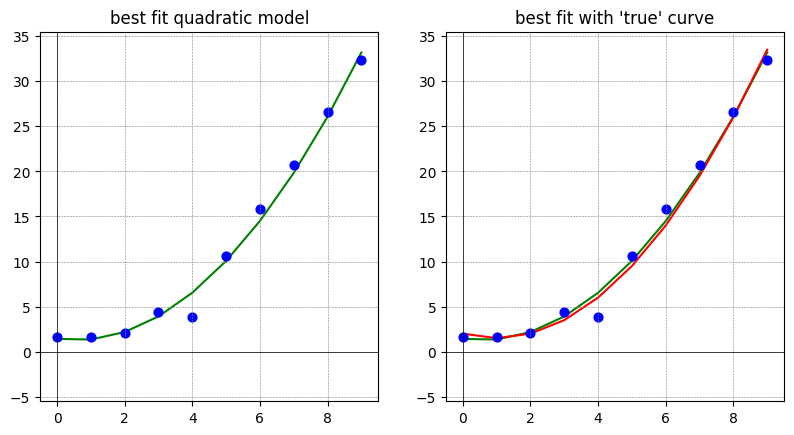

In [9]:
# Now checking how our model looks with the data
X = np.arange(10)

Ymodel = [ a*(x**2) + b*x + c for x in X ]

fig, (ax1,ax2) = plt.subplots(1,2,figsize = plt.figaspect(0.5)) # This way is more compatible with multiple figures.

# ===== Subplot 1 =====
# Making the plots
ax1.plot(X,Ymodel,color='green',zorder=0) # Model
ax1.scatter(X,Y2,s=40,color='blue') # Data

# Draw axis lines and grid
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.grid(color='grey',linestyle='--',linewidth=0.4)

# Set plot window
dx = 0.5; # buffer(s) for window
dy = dx; 
ax1.set_xbound(0-dx,9+dx)
ax1.set_ybound(-5-dy,35+dy)

ax1.set_title("best fit quadratic model")

# ===== Subplot 2 =====

Ytrue = [ (0.5)*(x**2) - x + 2.0 for x in X ]

# Making the plots
ax2.plot(X,Ymodel,color='green',zorder=0)
ax2.plot(X,Ytrue,color='red',zorder=0)
ax2.scatter(X,Y2,s=40,color='blue')

# Draw axis lines and grid
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(color='grey',linestyle='--',linewidth=0.4)

# Set plot window
dx = 0.5; # buffer(s) for window
ax2.set_xbound(0-dx,9+dx)
ax2.set_ybound(-5-dx,35+dx)

ax2.set_title("best fit with \'true\' curve")

plt.show()

Side-by-side we plot the least-squares best fit model (green line), and a plot with the 'true' model (red line) that I originally used to generate the data (before adding random noise). In total,
    $$
    \begin{aligned}
    \text{Computed model:}\quad y &= (0.45)x^{2} + (-0.52)x + 1.42, \\
    \text{`True' model:}\quad y &= (0.5)x^{2} - (1.0)x + 2.0,
    \end{aligned}
    $$
The parameters seem off, but again I added quite a bit of noise, and the graphs do seem quite close (for now--if $x$ went further then they would grow apart).

In [ ]:
# How I generated the second data
X = np.arange(10)
Y = (0.5)*(X**2) - X + 2.0
noise2 = np.array([-0.34,0.08,0.11,0.90,-2.14,1.10,1.85,1.16,0.59,-1.12]) # could again use random.random()

---

# **An exact 'hit'**

To perhaps 'boost' our confidence in the above 'least squares method', we can check that it can actually register an 'exact match' if our data doesn't have any noise at all. Thus, generate the data

| $x$  | 0  | 1  | 2  | 3  | 4  | 5   |  6  |  7  |  8  |  9  |
|:-----|----|----|----|----|----|-----|-----|-----|-----|-----|
| $y$  |2.0 |1.5 |2.0 |3.5 |6.0 | 9.5 |14.0 |19.5 |26.0 |33.5 |

with the function $y = \tfrac{1}{2}x^{2} - x + 2$. Following our previous setup and using a quadratic model $y = ax^{2}+bx+c$, we would attempt to solve the matrix equation

$$
    \begin{bmatrix} 
        0 & 0 & 1 \\ 
        1 & 1 & 1 \\
        4 & 2 & 1 \\
        9 & 3 & 1 \\
        16 & 4 & 1 \\
        25 & 5 & 1 \\
        36 & 6 & 1 \\
        49 & 7 & 1 \\
        64 & 8 & 1 \\ 
        81 & 9 & 1 
    \end{bmatrix} 
    \begin{bmatrix} a \\ b \\ c \end{bmatrix} = 
    \begin{bmatrix} 
        2.0 \\ 
        1.5 \\
        2.0 \\
        3.5 \\ 
        6.0 \\
        9.5 \\
        14.0 \\ 
        19.5 \\
        26.0 \\
        33.5
    \end{bmatrix}.
$$

Again using the formula for $\mathbf{x}$ from before...

In [10]:
X = np.arange(10)
Ytrue = np.array([2.00,1.50,2.00,3.50,6.00,9.50,14.00,19.50,26.00,33.50])

A = np.transpose(np.array([
    [x**2 for x in X],
    [x for x in X],
    [1 for x in X]
]))

leastSqVec = np.linalg.inv(A.T @ A) @ A.T @ Ytrue
a, b, c = np.round(leastSqVec, decimals=2)

print('The approximate parameters are a={a}, b={b}, and c={c},\n so the \'best fit\' model is y = ({a})x^2 + ({b})x + {c}'.format(**{'a':a,'b':b,'c':c}))

The approximate parameters are a=0.5, b=-1.0, and c=2.0,
 so the 'best fit' model is y = (0.5)x^2 + (-1.0)x + 2.0


So we got an exact match!